# ------------------------ 당뇨병 데이터 ------------------------

# 1. 데이터 가져오기

In [1]:
# 필요 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

- 총 데이터의 개수 

In [2]:
# 데이터 가져오기
load = load_diabetes()

# 키값 확인
print(load.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
# 데이터 값 확인
print(load.feature_names)
print(load.data_filename)
print(load.target_filename)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/diabetes_data.csv.gz
/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/diabetes_target.csv.gz


- 10개의 정보를 가진 입력값이 442개 있는 배열

In [4]:
# 데이터 정보 확인
print(load.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [5]:
# 데이터 값 저장 
df_X = load.data
df_y = load.target

# 데이터 크기 확인
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [6]:
# 데이터 이름 개수 및 확인
for i, feature_name in enumerate(load.feature_names):
    print('feature no.{} : {}'.format(i+1,feature_name))

feature no.1 : age
feature no.2 : sex
feature no.3 : bmi
feature no.4 : bp
feature no.5 : s1
feature no.6 : s2
feature no.7 : s3
feature no.8 : s4
feature no.9 : s5
feature no.10 : s6


# 2. 모델에 입력할 데이터 X 준비하기

In [7]:
df_X = np.array(df_X)
print(df_X.shape)
type(df_X)

(442, 10)


numpy.ndarray

# 3. 모델에 입력할 데이터 y 준비하기

In [8]:
df_y = np.array(df_y)
print(df_y.shape)
type(df_y)

(442,)


numpy.ndarray

# 4. train / test 데이터셋 분리 

In [9]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state= 22)

print('X_train 개수:', len(X_train), 'X_test 개수:', len(X_test))

# 데이터 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train 개수: 349 X_test 개수: 93
(349, 10) (349,)
(93, 10) (93,)


# 5. 모델 준비하기

In [10]:
# w,b 값 임의 생성
W = np.random.rand(10)
b = np.random.rand(1)

# 모델 함수 구현
def model(X, W, b):
    predictions = 0
    for i in range(10): 
        predictions += X[:, i] * W[i] #x와 w값 매칭
    predictions += b # 마지막에 b값 추가
    return predictions

# 6. 손실함수 정의하기

In [11]:
def MSE(a,b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 7. 기울기 함수 정의하기

- w1 부터 w10까지 + b값 기울기 구현 

In [12]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.53049915  -13.65881195 -189.42962086 -142.50735238  -68.21824697
  -55.95259933  127.55287289 -138.9083389  -182.73031374 -123.38708308]
db: -303.863908788442


# 8. 모델학습, test 데이터 확인 및 시각화

- 목적 
  - 학습률이 변경되었을 때, Loss값의 변화를 알고싶다  
  
    생각 1) 학습률을 누적하지 않고, 학습률을 각각 설정 후 상호연관성이 없을 때 loss값의 변화를 비교한다  
           해당 문제를 이행하기 위해 w,b의 값을 copy를 통해, 각 모델을 돌리기전에 w,b의 값을 초기화 하여 학습률 마다 loss값을 비교한다  
           즉, 각 학습률 별 모델을 1만번씩 돌린다.
      
    생각 2) 모델에 4가지 학습률을 1만번 누적하여 돌려서 loss값을 작게 만든다. 


##### 생각 1

In [13]:
# w,b 초기화를 위해 
w1 = W.copy()
b1 = b.copy()

w2 = W.copy()
b2 = b.copy()

w3 = W.copy()
b3 = b.copy()

w4 = W.copy()
b4 = b.copy()

- 학습률: 0.001 / 반복 횟수: 1만번

In [14]:
LEARNING_RATE = 0.001
awq1 = {} # 빈 딕셔너리에 100단위로 키:벨류 값을 반환
losses1 = []

# 값 초기화
W = w1
b = b1

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses1.append(L)
    if i % 100 == 0:
        awq1[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21125.0243
Iteration 200 : Loss 15777.5441
Iteration 300 : Loss 12143.3502
Iteration 400 : Loss 9662.1513
Iteration 500 : Loss 7957.9952
Iteration 600 : Loss 6778.4977
Iteration 700 : Loss 5954.1213
Iteration 800 : Loss 5370.8844
Iteration 900 : Loss 4952.0722
Iteration 1000 : Loss 4645.9774
Iteration 1100 : Loss 4417.6829
Iteration 1200 : Loss 4243.5514
Iteration 1300 : Loss 4107.5305
Iteration 1400 : Loss 3998.6742
Iteration 1500 : Loss 3909.4789
Iteration 1600 : Loss 3834.7663
Iteration 1700 : Loss 3770.9335
Iteration 1800 : Loss 3715.4474
Iteration 1900 : Loss 3666.5051
Iteration 2000 : Loss 3622.8048
Iteration 2100 : Loss 3583.3907
Iteration 2200 : Loss 3547.5478
Iteration 2300 : Loss 3514.7308
Iteration 2400 : Loss 3484.5154
Iteration 2500 : Loss 3456.5643
Iteration 2600 : Loss 3430.6048
Iteration 2700 : Loss 3406.4120
Iteration 2800 : Loss 3383.7977
Iteration 2900 : Loss 3362.6021
Iteration 3000 : Loss 3342.6881
Iteration 3100 : Loss 3323.9370
Iteration 3200

- 학습률: 0.0005 / 반복 횟수: 1만번

In [15]:
LEARNING_RATE = 0.0005
awq2 = {}
losses2 = []

# 값 초기화
W = w2
b = b2

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses2.append(L)
    if i % 100 == 0:
        awq2[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 24690.1476
Iteration 200 : Loss 21128.1686
Iteration 300 : Loss 18196.5524
Iteration 400 : Loss 15781.7721
Iteration 500 : Loss 13790.8471
Iteration 600 : Loss 12147.6188
Iteration 700 : Loss 10789.7016
Iteration 800 : Loss 9665.9876
Iteration 900 : Loss 8734.6026
Iteration 1000 : Loss 7961.2336
Iteration 1100 : Loss 7317.7593
Iteration 1200 : Loss 6781.1287
Iteration 1300 : Loss 6332.4434
Iteration 1400 : Loss 5956.2061
Iteration 1500 : Loss 5639.7048
Iteration 1600 : Loss 5372.5095
Iteration 1700 : Loss 5146.0596
Iteration 1800 : Loss 4953.3259
Iteration 1900 : Loss 4788.5343
Iteration 2000 : Loss 4646.9393
Iteration 2100 : Loss 4524.6382
Iteration 2200 : Loss 4418.4198
Iteration 2300 : Loss 4325.6394
Iteration 2400 : Loss 4244.1173
Iteration 2500 : Loss 4172.0552
Iteration 2600 : Loss 4107.9678
Iteration 2700 : Loss 4050.6269
Iteration 2800 : Loss 3999.0153
Iteration 2900 : Loss 3952.2895
Iteration 3000 : Loss 3909.7483
Iteration 3100 : Loss 3870.8082
Iteration 

- 학습률: 0.00003 / 반복 횟수: 1만번

In [16]:
LEARNING_RATE = 0.00003
awq3 = {}
losses3 = []

# 값 초기화
W = w3
b = b3

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses3.append(L)
    if i % 100 == 0:
        awq3[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 28736.7780
Iteration 200 : Loss 28455.7678
Iteration 300 : Loss 28178.0416
Iteration 400 : Loss 27903.5607
Iteration 500 : Loss 27632.2863
Iteration 600 : Loss 27364.1806
Iteration 700 : Loss 27099.2059
Iteration 800 : Loss 26837.3251
Iteration 900 : Loss 26578.5015
Iteration 1000 : Loss 26322.6989
Iteration 1100 : Loss 26069.8813
Iteration 1200 : Loss 25820.0134
Iteration 1300 : Loss 25573.0603
Iteration 1400 : Loss 25328.9873
Iteration 1500 : Loss 25087.7603
Iteration 1600 : Loss 24849.3456
Iteration 1700 : Loss 24613.7098
Iteration 1800 : Loss 24380.8200
Iteration 1900 : Loss 24150.6436
Iteration 2000 : Loss 23923.1484
Iteration 2100 : Loss 23698.3027
Iteration 2200 : Loss 23476.0751
Iteration 2300 : Loss 23256.4345
Iteration 2400 : Loss 23039.3504
Iteration 2500 : Loss 22824.7922
Iteration 2600 : Loss 22612.7303
Iteration 2700 : Loss 22403.1349
Iteration 2800 : Loss 22195.9768
Iteration 2900 : Loss 21991.2272
Iteration 3000 : Loss 21788.8576
Iteration 3100 : Lo

- 학습률: 0.00001 / 반복 횟수: 1만번

In [17]:
LEARNING_RATE = 0.00001
awq4 = {}
losses4 = []

# 값 초기화
W = w4
b = b4

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses4.append(L)
    if i % 100 == 0:
        awq4[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 28925.9640
Iteration 200 : Loss 28831.1884
Iteration 300 : Loss 28736.7836
Iteration 400 : Loss 28642.7480
Iteration 500 : Loss 28549.0802
Iteration 600 : Loss 28455.7787
Iteration 700 : Loss 28362.8422
Iteration 800 : Loss 28270.2690
Iteration 900 : Loss 28178.0579
Iteration 1000 : Loss 28086.2073
Iteration 1100 : Loss 27994.7158
Iteration 1200 : Loss 27903.5820
Iteration 1300 : Loss 27812.8046
Iteration 1400 : Loss 27722.3819
Iteration 1500 : Loss 27632.3127
Iteration 1600 : Loss 27542.5956
Iteration 1700 : Loss 27453.2291
Iteration 1800 : Loss 27364.2119
Iteration 1900 : Loss 27275.5426
Iteration 2000 : Loss 27187.2198
Iteration 2100 : Loss 27099.2420
Iteration 2200 : Loss 27011.6081
Iteration 2300 : Loss 26924.3165
Iteration 2400 : Loss 26837.3659
Iteration 2500 : Loss 26750.7550
Iteration 2600 : Loss 26664.4824
Iteration 2700 : Loss 26578.5469
Iteration 2800 : Loss 26492.9469
Iteration 2900 : Loss 26407.6813
Iteration 3000 : Loss 26322.7486
Iteration 3100 : Lo

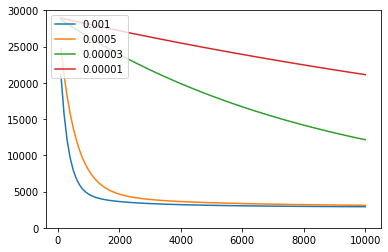

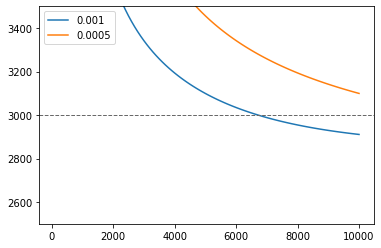

In [18]:
# 4가지 학습률별 loss값 그래프
plt.plot(awq1.keys(),awq1.values(), label = '0.001')
plt.plot(awq2.keys(),awq2.values(), label = '0.0005')
plt.plot(awq3.keys(),awq3.values(), label = '0.00003')
plt.plot(awq4.keys(),awq4.values(), label = '0.00001')
plt.ylim(0,30000)
plt.legend(loc = 'upper left')
plt.show()

# 3000 언저리 loss값의 그래프(확대)
plt.plot(awq1.keys(),awq1.values(), label = '0.001')
plt.plot(awq2.keys(),awq2.values(), label = '0.0005')
plt.ylim(2500,3500)
plt.legend(loc = 'upper left')
plt.axhline(y = 3000, color = 'dimgray',lw = 1, ls = '--') # lw: 두께 ls: 선스타일
plt.show()


### 생각1_결론 : 각 학습률별 1만번을 돌렸을 때, 학습률이 0.001 일때, loss 값이 3000이하로 떨어진다.

- 0.001 / 0.0005 / 0.00003 / 0.00001의 학습률을 토대로 각 2500번씩 모델에 돌림

In [19]:
awq = {}
losses = []

# 1번 학습률 
LEARNING_RATE = 0.001
for i in range(1, 2501):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 250 == 0:
        awq[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))
print('------------------------')

# 2번 학습률
LEARNING_RATE = 0.0005
for i in range(1, 2501):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 250 == 0:
        awq[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))
print('------------------------')

# 3번 학습률
LEARNING_RATE = 0.00003
for i in range(1, 2501):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 250 == 0:
        awq[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))
print('------------------------')

# 4번 학습률
LEARNING_RATE = 0.00001
for i in range(1, 2501):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 250== 0:
        awq[i] = L
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 250 : Loss 10787.9245
Iteration 500 : Loss 6779.3651
Iteration 750 : Loss 5144.9632
Iteration 1000 : Loss 4417.8154
Iteration 1250 : Loss 4050.2977
Iteration 1500 : Loss 3834.7930
Iteration 1750 : Loss 3690.2636
Iteration 2000 : Loss 3583.3995
Iteration 2250 : Loss 3499.3267
Iteration 2500 : Loss 3430.6092
------------------------
Iteration 250 : Loss 3400.6233
Iteration 500 : Loss 3373.0391
Iteration 750 : Loss 3347.5618
Iteration 1000 : Loss 3323.9462
Iteration 1250 : Loss 3301.9859
Iteration 1500 : Loss 3281.5051
Iteration 1750 : Loss 3262.3526
Iteration 2000 : Loss 3244.3979
Iteration 2250 : Loss 3227.5276
Iteration 2500 : Loss 3211.6425
------------------------
Iteration 250 : Loss 3210.7188
Iteration 500 : Loss 3209.7983
Iteration 750 : Loss 3208.8811
Iteration 1000 : Loss 3207.9670
Iteration 1250 : Loss 3207.0560
Iteration 1500 : Loss 3206.1482
Iteration 1750 : Loss 3205.2436
Iteration 2000 : Loss 3204.3420
Iteration 2250 : Loss 3203.4436
Iteration 2500 : Loss 3202.548

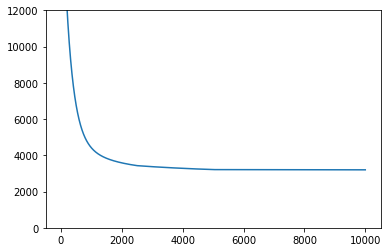

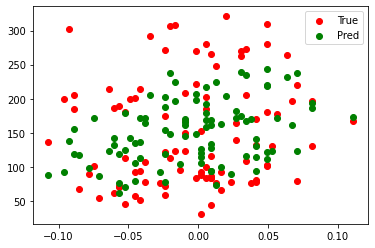

In [20]:
plt.plot(losses)
plt.ylim(0,12000)
plt.show()

# test 데이터에 대한 loss값
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

# 예측값과 테스트 값의 비교
plt.scatter(X_test[:, 0], y_test, c = 'r', label = 'True')
plt.scatter(X_test[:, 0], prediction, c = 'g', label = 'Pred')
plt.legend()
plt.show()

### 생각2_결론: 4가지 학습률 중 가장 큰 값으로 먼저 loss 값을 감소시킨 후 점차 작은 값으로 loss값을 감소하였으나 최종 loss값은 약 3200 값으로 목표치인 3000이하의 값을 도달하지 못하였다.


# 최종결론 
- 학습률이 큰 경우 loss 값의 작아지는 것을 확인하였다.
- 현재 데이터의 경우 큰 학습률로 1만번 진행하는 것이, 큰 학습률 부터 작은 학습률까지 누적으로 1만번 진행하는 것에 근소한 차이로 loss값이 더 작다.

# ----------------------- 당뇨병 데이터 종료 -----------------------

# ------------------------- 자전거 데이터 -------------------------

# 1. 데이터 가져오기

In [21]:
# 필요 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

- 컬럼 확인  
datatime: 시간  
season: 봄(1) / 여름(2) / 가을(3) / 겨울(4)  
holiday: 휴일O(1) / 휴일X(0)  
workingday: 근무일(=평일)  
weather: 날씨의 상태 (1 > 2 > 3 > 4)  
temp: 온도(섭씨)  
atemp: 체감온도  
humidity: 습도  
windspeed: 풍속  
casual: 등록되지 않은 사용자 대여 횟수  
registered: 등록된 사용자 대여 횟수  
count: 총 대여 개수 
  
- 10886개의 데이터와 12개의 feature가 존재

### count를 제외한 11가지 feature가 count에 어떤 영향을 미치는지 확인 해보고자 한다.

In [22]:
bike = pd.read_csv('/Users/keonkookkim/Desktop/aiffel_data/bike-sharing-demand/train.csv')

print(bike.shape)
bike.tail()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [23]:
bike.info()
bike

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 2. Datatime 칼럼 변환

In [24]:
# 자료형으로 전환
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.info() # 변환 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [25]:
# 각 시간별 컬럼 생성
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

# 기존 datetime 컬럼 삭제
del bike['datetime']

In [26]:
# 컬럼 생성 확인 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  minute      10886 non-null  int64  
 16  second      10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


In [27]:
# 결측치 확인
bike.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

# 3. datatime 데이터 개수 시각화

In [28]:
# 각 컬럼별 유니크 확인 
print(bike['year'].unique())
print(bike['month'].unique())
print(bike['day'].unique())
print(bike['hour'].unique())
print(bike['minute'].unique())
print(bike['second'].unique())

[2011 2012]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0]
[0]


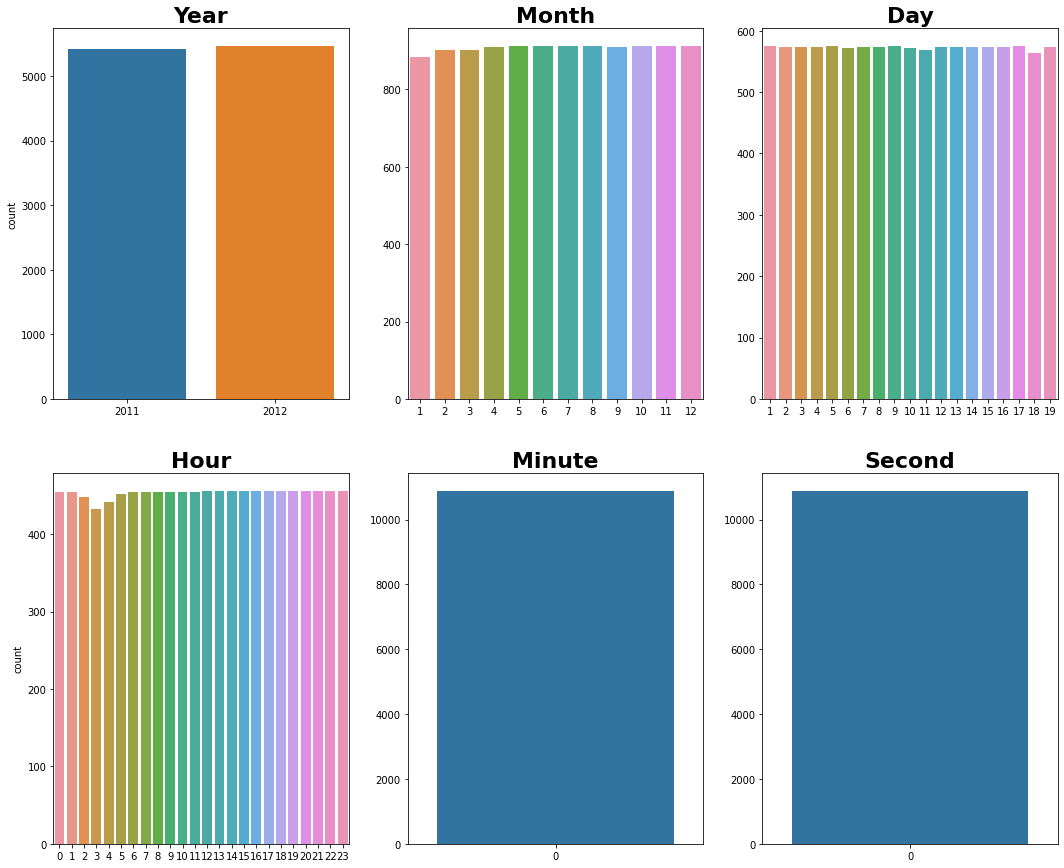

In [29]:
# 경고메세지 삭제 처리
import warnings
warnings.filterwarnings(action='ignore')

# 그래프 그리기
f, ax = plt.subplots(2,3, figsize = (18,15))

sns.countplot(bike['year'],ax = ax[0,0])
sns.countplot(bike['month'],ax = ax[0,1])
sns.countplot(bike['day'],ax = ax[0,2])
sns.countplot(bike['hour'],ax = ax[1,0])
sns.countplot(bike['minute'],ax = ax[1,1])
sns.countplot(bike['second'],ax = ax[1,2])

# 각 그래프별 제목 작성 
ax[0,0].set_title('Year',weight="bold",fontsize = 22)
ax[0,1].set_title('Month',weight="bold",fontsize = 22)
ax[0,2].set_title('Day',weight="bold",fontsize = 22)
ax[1,0].set_title('Hour',weight="bold",fontsize = 22)
ax[1,1].set_title('Minute',weight="bold",fontsize = 22)
ax[1,2].set_title('Second',weight="bold",fontsize = 22)

# 각 그래프 별 x축 이름 삭제 
ax[0,0].axes.set_xlabel('')
ax[0,1].axes.set_xlabel('')
ax[0,2].axes.set_xlabel('')
ax[1,0].axes.set_xlabel('')
ax[1,1].axes.set_xlabel('')
ax[1,2].axes.set_xlabel('')

# 1,4번째만 남기고 그래프 별 y축 이름 삭제
ax[0,1].axes.set_ylabel('')
ax[0,2].axes.set_ylabel('')
ax[1,1].axes.set_ylabel('')
ax[1,2].axes.set_ylabel('')

warnings.filterwarnings(action='default')

# 4. 데이터 분리

- minute, second 데이터는 모두 0값을 가지므로 삭제
- Count와 나머지 feature의 상관계수를 확인하여 상관계수가 작은 컬럼 삭제

In [30]:
del bike['minute']
del bike['second']

/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- 상관계수 확인을 위한 히트맵 그래프 생성

<ipython-input-31-d24733376863>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(bike.corr(), dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'season'),
  Text(1.5, 0, 'holiday'),
  Text(2.5, 0, 'workingday'),
  Text(3.5, 0, 'weather'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'atemp'),
  Text(6.5, 0, 'humidity'),
  Text(7.5, 0, 'windspeed'),
  Text(8.5, 0, 'casual'),
  Text(9.5, 0, 'registered'),
  Text(10.5, 0, 'count'),
  Text(11.5, 0, 'year'),
  Text(12.5, 0, 'month'),
  Text(13.5, 0, 'day'),
  Text(14.5, 0, 'hour')])

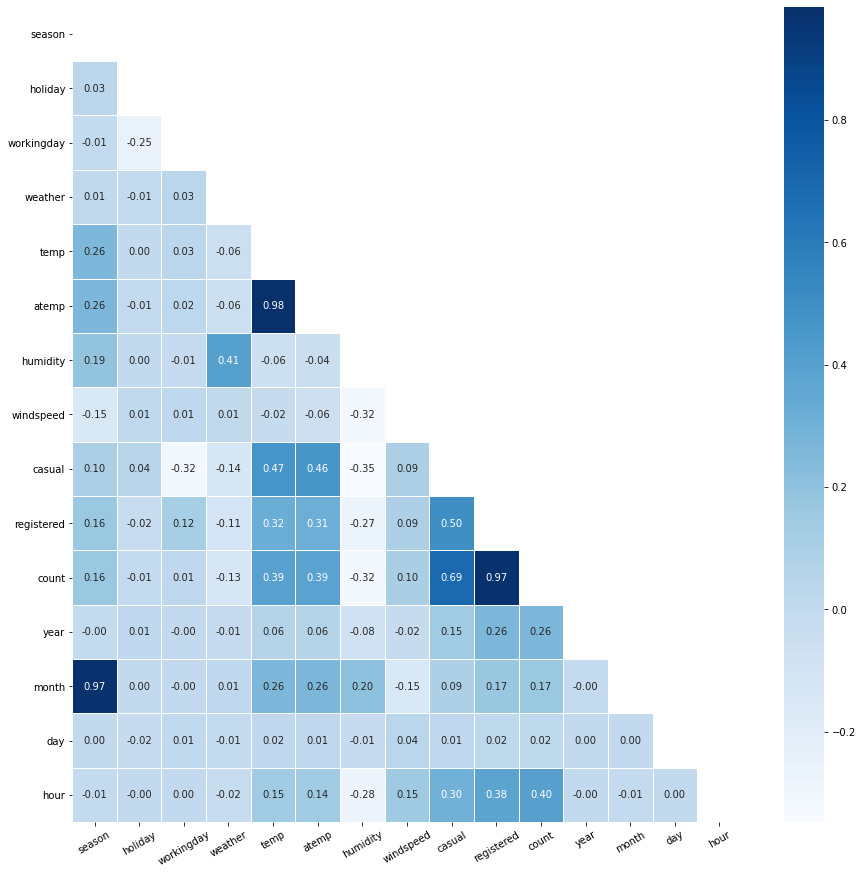

In [31]:
# 상관계수 확인
plt.figure(figsize=(15,15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(bike.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 위쪽 삼각형 True 아래쪽 삼각형 False

sns.heatmap(data = bike.corr(), annot=True,  # annot : 실제값 그리기 
mask = mask , fmt = '.2f', linewidths=.5, cmap='Blues') # mask = 표시하지 않을 부분 지정
plt.xticks(rotation = 30)


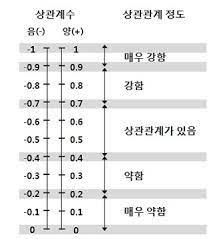

### 상관계수를 기준으로한 데이터 제거

- 상관계수를 비교한 결과 위 이미지의 기준을 토대로 제거하려 하였으나  
  기준점을 낮춰서 ± 0.01 < 상관계수 < ± 0.1 사이의 상관계수만 제거하려 한다.  
  제거 목록: holiday, workingday, day

In [32]:
# 상관계수에 따른 데이터 제거
bike_df = bike.copy()

del bike_df['holiday']
del bike_df['workingday']
del bike_df['day']
del bike_df['count']

In [33]:
# X,y값 저장
X = bike_df
y = bike['count']

# 크기 확인
print(X.shape)
print(y.shape)

(10886, 11)
(10886,)


In [34]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 27)

print('X_train 개수:', len(X_train), 'X_test 개수:', len(X_test))

X_train 개수: 8708 X_test 개수: 2178


# 5. 로지스틱 회귀분석 모델학습

In [35]:
# 선형함수 모델 선택
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측값 
predictions = model.predict(X_test)

# 6. X_test에 대한 예측값 출력 및 손실함수 계산

/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


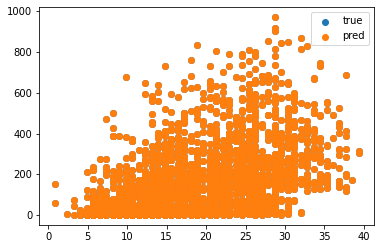

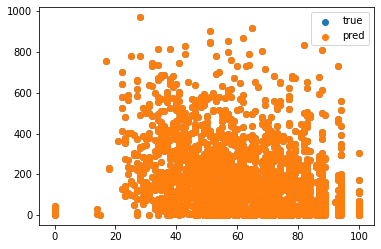

In [36]:
# mse값 추출
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)

# rmse값 추출
rmse = (mean_squared_error(y_test, predictions)) ** 0.5

# 그래프 그리기
plt.scatter(X_test.loc[:,'temp'], y_test, label="true")
plt.scatter(X_test.loc[:,'temp'], predictions, label="pred")
plt.legend()
plt.show()

plt.scatter(X_test.loc[:,'humidity'], y_test, label="true")
plt.scatter(X_test.loc[:,'humidity'], predictions, label="pred")
plt.legend()
plt.show()

In [37]:
print(mse)
print(rmse)

1.5608665346578058e-24
1.2493464430084258e-12


/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


해당 그래프를 보면 실제값(파란색)과 예측값(주황색)이 모두 일치하는 그래프를 볼 수 있다. 
높은 정확성을 보인다고 말할 수 있지만, 반대로 의심 또한 해봐야 한다.


### feature값 제거
- casual값과 registered값은 해당 두 값을 더했을 때, count값이 나오는 지표로써 상관계수가 매우 높음을 알 수 있다.  
  그리하여 해당 두가지 값도 추가적으로 제거 했을 때, RMSE / MSE 값의 변화를 알아보고자 한다
    
- 제거 대상: casual, registered, holiday, workingday, day

In [38]:
# 상관계수에 따른 데이터 제거
bike_df2 = bike.copy()

del bike_df2['holiday']
del bike_df2['workingday']
del bike_df2['day']
del bike_df2['count']
del bike_df2['casual']
del bike_df2['registered']

In [39]:
# X,y값 저장
X = bike_df2
y = bike['count']

# 크기 확인
print(X.shape)
print(y.shape)

(10886, 9)
(10886,)


In [40]:
# 데이터 분리
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state= 27)

print('X_train 개수:', len(X_train2), 'X_test 개수:', len(X_test2))



X_train 개수: 8708 X_test 개수: 2178


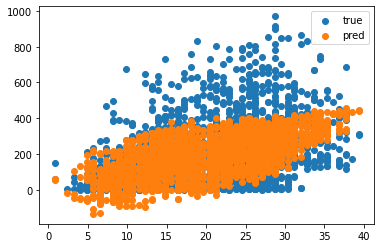

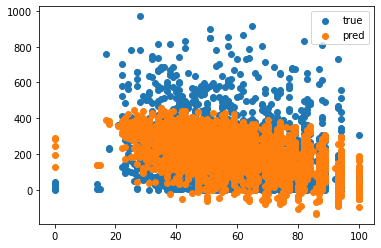

In [41]:
# 선형함수 모델 선택
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

# 모델 학습
model2.fit(X_train2, y_train2)

# 예측값 
predictions2 = model2.predict(X_test2)

# mse값 추출
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test2, predictions2)

# rmse값 추출
rmse2 = (mean_squared_error(y_test2, predictions2)) ** 0.5

# 그래프 그리기
plt.scatter(X_test2.loc[:,'temp'], y_test2, label="true")
plt.scatter(X_test2.loc[:,'temp'], predictions2, label="pred")
plt.legend()
plt.show()

plt.scatter(X_test2.loc[:,'humidity'], y_test2, label="true")
plt.scatter(X_test2.loc[:,'humidity'], predictions2, label="pred")
plt.legend()
plt.show()

In [42]:
print('상관계수에 따른 데이터 처리 후 MSE 값:' ,mse)
print('상관계수에 따른 데이터 처리 후 RMSE 값:',rmse,'\n')
print('상관계수 + 추가 데이터 처리 후 MSE 값:',mse2)
print('상관계수 + 추가 데이터 처리 후 RMSE 값:',rmse2)

상관계수에 따른 데이터 처리 후 MSE 값: 1.5608665346578058e-24
상관계수에 따른 데이터 처리 후 RMSE 값: 1.2493464430084258e-12 

상관계수 + 추가 데이터 처리 후 MSE 값: 19437.82674789028
상관계수 + 추가 데이터 처리 후 RMSE 값: 139.41960675561484


/Users/keonkookkim/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 결론
- 상관계수에 따른 데이터를 처리한 후 모델에 학습하고, 예측하는 과정을 지닌 후 성능을 평가하는값인 RMSE의 값은 다소 작은 값이 나왔다.
  하지만 데이터셋을 보면 casual값 + registered값 = count값이 나온다는 것을 알 수 있다.
  해당 데이터는 count값과 높은 상관계수가 있으나 정답지인 count값과 비슷한 값을 가지고 있어 모델에 학습이 정확하게 되지 않을 수 있기에  
  해당 2가지 값을 제거하고 모델에 학습하는 방법이 더 옳은 방법이라고 생각한다.


# ----------------------- 자전거 데이터 종료 -----------------------